In [1]:
import sympy as sp
import numpy as np


In [2]:
def neuron(f, inputs, weights, a=None):
    inputs = np.array(inputs)
    weights = np.array(weights)
    if inputs.shape != weights.shape:
        return None
    
    #print(np.sum(np.dot(inputs, weights)))
    return f(np.sum(np.dot(inputs, weights)), a)

logistic = lambda v, a : 1/(1 + sp.exp(-a * v))

def network_ex_113(inputs, a):
    hidden_11_out = neuron(logistic, inputs, [5, 1], a)
    hidden_12_out = neuron(logistic, inputs, [2, -3], a)
    hidden_21_out = neuron(logistic, [hidden_11_out, hidden_12_out], [3, -1], a)
    hidden_22_out = neuron(logistic, [hidden_11_out, hidden_12_out], [4, 6], a)
    return neuron(logistic, [hidden_21_out, hidden_22_out], [-2, 1], a)



In [3]:
x1, x2, a = sp.symbols("x1 x2 a")

In [4]:
output = network_ex_113([x1, x2], a)
output = sp.simplify(output)
print(output)

1/(1 + exp(-a*(1/(1 + exp(-a*(4/(1 + exp(-a*(5*x1 + x2))) + 6/(1 + exp(-a*(2*x1 - 3*x2)))))) - 2/(1 + exp(-a*(3/(1 + exp(-a*(5*x1 + x2))) - 1/(1 + exp(-a*(2*x1 - 3*x2)))))))))


In [5]:
sp.pprint(output)
output_lambdify = sp.lambdify((x1, x2, a), output, "numpy")

                                                           1                  
──────────────────────────────────────────────────────────────────────────────
        ⎛                          1                                          
     -a⋅⎜───────────────────────────────────────────────────── - ─────────────
        ⎜        ⎛         4                      6          ⎞           ⎛    
        ⎜     -a⋅⎜─────────────────── + ─────────────────────⎟        -a⋅⎜────
        ⎜        ⎜     -a⋅(5⋅x₁ + x₂)        -a⋅(2⋅x₁ - 3⋅x₂)⎟           ⎜    
        ⎜        ⎝1 + ℯ                 1 + ℯ                ⎠           ⎝1 + 
        ⎝1 + ℯ                                                   1 + ℯ        
1 + ℯ                                                                         

                                         
─────────────────────────────────────────
             2                          ⎞
────────────────────────────────────────⎟
     3                      1          ⎞⎟

In [6]:
data = []
for x1_ in np.arange(-10.,10.,.2):
    for x2_ in np.arange(-10.,10.,.2):
        data.append([x1_, x2_, output_lambdify(x1_, x2_, 5)])

In [7]:
data = np.array(data)

temp = data[:,2]
x = data[:,0]
y = data[:,1]
grid = temp.reshape((100, 100))


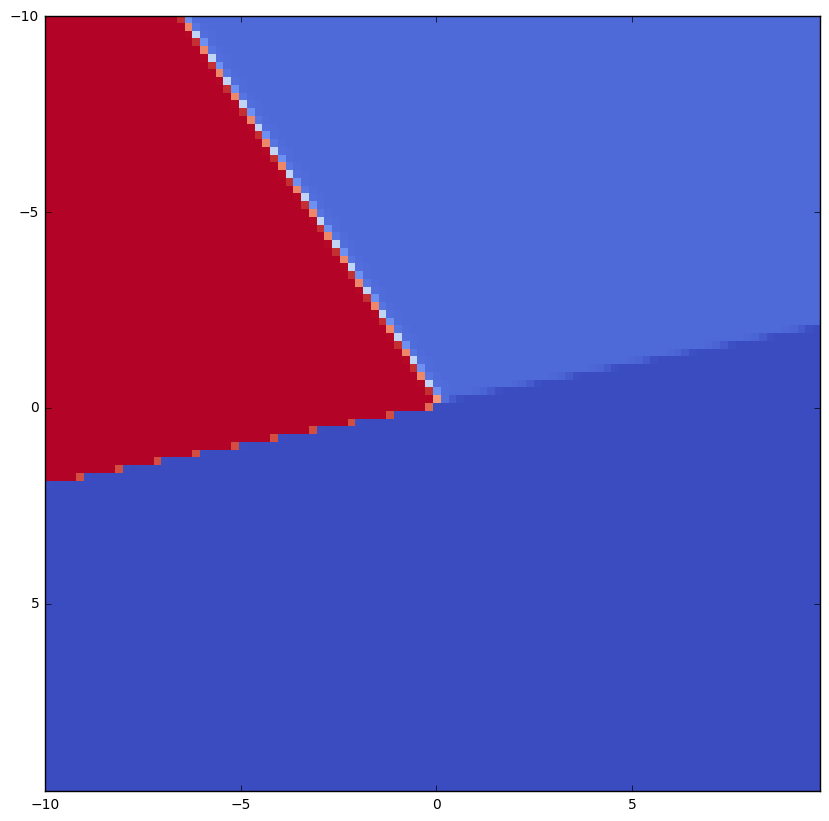

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

plt.figure(figsize=(10,10))
plt.imshow(grid, extent=(x.min(), x.max(), y.max(), y.min()),
           interpolation='nearest', cmap=cm.coolwarm)


In [9]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-10.,10.,.2)
y = np.arange(-10.,10.,.2)

x_mesh, y_mesh = np.meshgrid(x, y)

zs = np.array([output_lambdify(x1, x2, 5) for x1,x2 in zip(np.ravel(x_mesh), np.ravel(y_mesh))])
Z = zs.reshape(x_mesh.shape)


print(x_mesh.shape)

(100, 100)


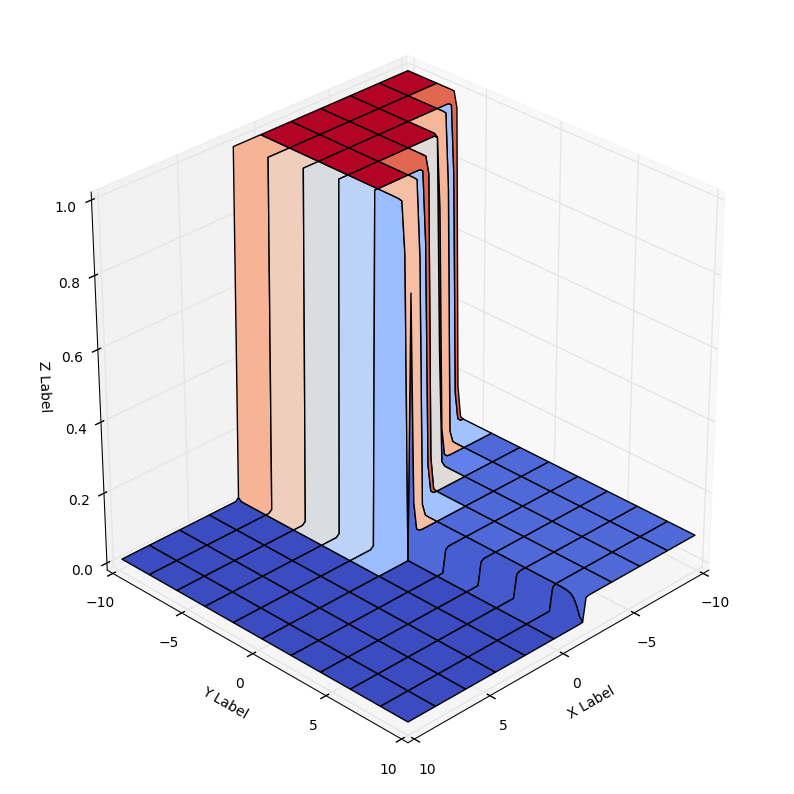

In [10]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, Z, cmap=cm.coolwarm, shade=False)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(30, 45)

plt.show()

In [11]:
linear = lambda v, a: v

def network_ex4_adaline_1(inputs, weights):
    inputs = np.array(inputs)
    weights = np.array(weights)

    if np.shape(inputs) != (2,) or np.shape(weights) != (3,):
        return None

    inputs = np.append(inputs, 1)

    return neuron(linear, inputs, weights)

w0, w1, w2 = sp.symbols("w0 w1 w2")

ex4_adaline_1 = network_ex4_adaline_1([x2,x1],[w2,w1,w0])



## Adaline exercise, network 1

In [12]:
print("Input-output mapping of the network:")
sp.pprint(ex4_adaline_1)
print()

# measurement di
di = sp.symbols("di")

# MSE component Ei
Ei = (di - ex4_adaline_1)**2

print("MSE for each input:")
sp.pprint(Ei)
print()

print("Partial derivatives over each weight:")
sp.pprint(sp.diff(Ei, w0))
sp.pprint(sp.diff(Ei, w1))
sp.pprint(sp.diff(Ei, w2))


Input-output mapping of the network:
w₀ + w₁⋅x₁ + w₂⋅x₂

MSE for each input:
                         2
(di - w₀ - w₁⋅x₁ - w₂⋅x₂) 

Partial derivatives over each weight:
-2⋅di + 2⋅w₀ + 2⋅w₁⋅x₁ + 2⋅w₂⋅x₂
-2⋅x₁⋅(di - w₀ - w₁⋅x₁ - w₂⋅x₂)
-2⋅x₂⋅(di - w₀ - w₁⋅x₁ - w₂⋅x₂)


In [13]:
def network_ex4_adaline_2(inputs, weights):
    inputs = np.array(inputs)
    weights = np.array(weights)

    if np.shape(inputs) != (2,) or np.shape(weights) != (6,):
        return None

    hidden_11_out = neuron(linear, inputs, weights[:2])
    hidden_12_out = neuron(linear, inputs, weights[2:4])
    return neuron(linear, [hidden_11_out, hidden_12_out], weights[4:])

v1, v2, u1, u2 = sp.symbols("v1 v2 u1 u2")

ex4_adaline_2 = network_ex4_adaline_2([x1,x2],[w1,v1,w2,v2,u1,u2])



In [14]:
print("Input-output mapping of the network:")
sp.pprint(ex4_adaline_2)
print()

# measurement di
di = sp.symbols("di")

# MSE component Ei
Ei = (di - ex4_adaline_2)**2

print("MSE for each input:")
sp.pprint(Ei)
print()

print("Partial derivatives over each weight:")
sp.pprint(sp.diff(Ei, w1))
sp.pprint(sp.diff(Ei, w2))
sp.pprint(sp.diff(Ei, v1))
sp.pprint(sp.diff(Ei, v2))
sp.pprint(sp.diff(Ei, u1))
sp.pprint(sp.diff(Ei, u2))

Input-output mapping of the network:
u₁⋅(v₁⋅x₂ + w₁⋅x₁) + u₂⋅(v₂⋅x₂ + w₂⋅x₁)

MSE for each input:
                                              2
(di - u₁⋅(v₁⋅x₂ + w₁⋅x₁) - u₂⋅(v₂⋅x₂ + w₂⋅x₁)) 

Partial derivatives over each weight:
-2⋅u₁⋅x₁⋅(di - u₁⋅(v₁⋅x₂ + w₁⋅x₁) - u₂⋅(v₂⋅x₂ + w₂⋅x₁))
-2⋅u₂⋅x₁⋅(di - u₁⋅(v₁⋅x₂ + w₁⋅x₁) - u₂⋅(v₂⋅x₂ + w₂⋅x₁))
-2⋅u₁⋅x₂⋅(di - u₁⋅(v₁⋅x₂ + w₁⋅x₁) - u₂⋅(v₂⋅x₂ + w₂⋅x₁))
-2⋅u₂⋅x₂⋅(di - u₁⋅(v₁⋅x₂ + w₁⋅x₁) - u₂⋅(v₂⋅x₂ + w₂⋅x₁))
(-2⋅v₁⋅x₂ - 2⋅w₁⋅x₁)⋅(di - u₁⋅(v₁⋅x₂ + w₁⋅x₁) - u₂⋅(v₂⋅x₂ + w₂⋅x₁))
(-2⋅v₂⋅x₂ - 2⋅w₂⋅x₁)⋅(di - u₁⋅(v₁⋅x₂ + w₁⋅x₁) - u₂⋅(v₂⋅x₂ + w₂⋅x₁))


To find the minimum of the MSE, each component of the above partial derivatives has to be zero.

## New classification example with bias

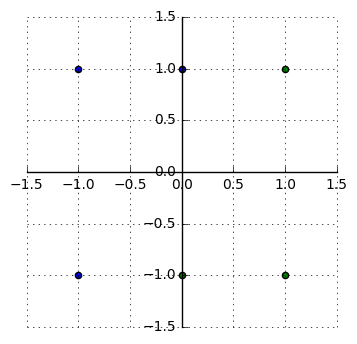

In [15]:
x_c1 = np.array([1,1,0])
y_c1 = np.array([1,-1,-1])
x_c2 = np.array([-1,-1,0])
y_c2 = np.array([-1,1,1])

fig, ax = plt.subplots()

ax.scatter(x_c1, y_c1, c='g')
ax.scatter(x_c2, y_c2, c='b')

ax.set_aspect('equal')
ax.grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show(fig)

Adjusted coordinates:



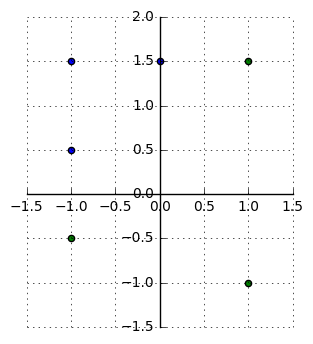

In [16]:
print("Adjusted coordinates:\n")

x_c1 = np.array([1,1,-1])
y_c1 = np.array([1.5,-1,-0.5])
x_c2 = np.array([-1,-1,0])
y_c2 = np.array([0.5,1.5,1.5])

fig, ax = plt.subplots()

ax.scatter(x_c1, y_c1, c='g')
ax.scatter(x_c2, y_c2, c='b')

ax.set_aspect('equal')
ax.grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

plt.show(fig)